In [2]:
import tensorflow as tf
import GPUtil

# Check if TensorFlow sees the GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"TensorFlow is using the following GPU(s):")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPU detected by TensorFlow.")

# Use GPUtil to get detailed GPU information
gpus = GPUtil.getGPUs()
for gpu in gpus:
    print(f"GPU ID: {gpu.id}, Name: {gpu.name}, Load: {gpu.load*100}%, Memory Free: {gpu.memoryFree}MB, Memory Used: {gpu.memoryUsed}MB, Memory Total: {gpu.memoryTotal}MB")


TensorFlow is using the following GPU(s):
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
GPU ID: 0, Name: NVIDIA GeForce RTX 3050 Laptop GPU, Load: 0.0%, Memory Free: 3964.0MB, Memory Used: 0.0MB, Memory Total: 4096.0MB


this is the project of end to end text classfication

In [3]:
import pandas as pd

# Correct path format for the D drive (using raw string)


# Load the dataset
data = pd.read_csv('D:\DataScience\Reviews\Reviews.csv')

# Display the first few rows
print(data.head())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy.sparse as sp
from tensorflow.keras import layers, models
import tensorflow as tf

In [5]:
# Load the dataset
data = pd.read_csv('D:\DataScience\Reviews\Reviews.csv')

# Display first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing 'Text' or 'Score'
data = data.dropna(subset=['Text', 'Score'])

# Remove duplicate rows
data = data.drop_duplicates(subset=['UserId', 'ProfileName', 'Time', 'Text'])

# Define sentiment labels
def label_sentiment(score):
    if score in [4, 5]:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

data['Sentiment'] = data['Score'].apply(label_sentiment)

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [6]:
import nltk

# Set the NLTK data path
nltk.data.path.append('D:/DataScience/nltk_data')

# Download necessary data
nltk.download('stopwords', download_dir='D:/DataScience/nltk_data')
nltk.download('punkt_tab', download_dir='D:/DataScience/nltk_data')
nltk.download('wordnet', download_dir='D:/DataScience/nltk_data')


[nltk_data] Downloading package stopwords to
[nltk_data]     D:/DataScience/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     D:/DataScience/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to D:/DataScience/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:

nltk.data.path.append("D:/DataScience/nltk_data")
from nltk.tokenize import sent_tokenize, word_tokenize 
# Define preprocessing functions
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]
    return ' '.join(words)

# Apply preprocessing
data['Cleaned_Text'] = data['Text'].apply(preprocess_text)
print(data.head())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


In [8]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Cleaned_Text'])  # Keep this as a sparse matrix

# Encoding the target variable
y = data['Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

# Train-test split with sparse matrix
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Check if indices in y_train match indices in X_train
print("y_train indices:", y_train.index)
print("X_train indices:", range(X_train.shape[0]))

# If indices don't match, reindex y_train
y_train = y_train.reindex(range(X_train.shape[0]))
y_val = y_val.reindex(range(X_val.shape[0]))

y_train indices: Index([ 72048, 414504,  15363, 282039,   2660, 532190, 355234,  42118, 246306,
       528941,
       ...
       162958,  60087, 264429, 127092, 139425, 343415, 522737, 156071, 176309,
       142746],
      dtype='int64', length=315146)
X_train indices: range(0, 315146)


y_train indices: RangeIndex(start=0, stop=315146, step=1)
X_train indices: range(0, 315146)
Invalid labels in y_train: 1        -1.0
2         NaN
3        -1.0
7         NaN
11        NaN
         ... 
315138    NaN
315139    NaN
315140    NaN
315141   -1.0
315143   -1.0
Name: Sentiment, Length: 150364, dtype: float64
Invalid labels in y_val: 0       NaN
1       NaN
3       NaN
4       NaN
5       NaN
         ..
78781   NaN
78782   NaN
78783   NaN
78784   NaN
78786   NaN
Name: Sentiment, Length: 66855, dtype: float64
Num GPUs Available:  1
Epoch 1/10
5149/5149 [==============================] - 138s 26ms/step - loss: 0.3068 - accuracy: 0.9101 - val_loss: 0.3385 - val_accuracy: 0.8938
Epoch 2/10
5149/5149 [==============================] - 133s 26ms/step - loss: 0.3033 - accuracy: 0.9101 - val_loss: 0.3384 - val_accuracy: 0.8940
Epoch 3/10
5149/5149 [==============================] - 133s 26ms/step - loss: 0.2999 - accuracy: 0.9102 - val_loss: 0.3415 - val_accuracy: 0.8941
Epoch 4/10


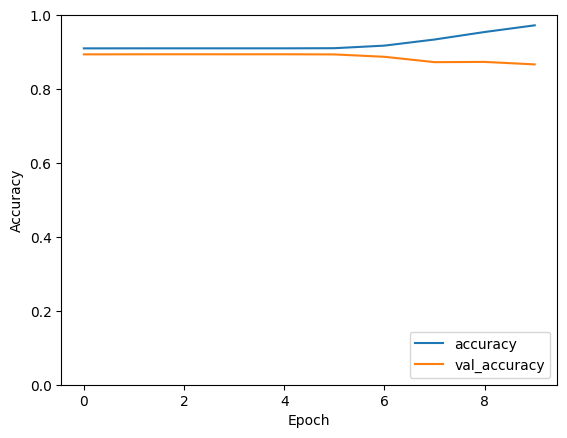

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.sparse import csr_matrix

def dense_data_generator(X, y, batch_size):
    """Generate batches of data for training with dense matrices."""
    while True:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        for start in range(0, len(indices), batch_size):
            batch_indices = indices[start:start + batch_size]
            batch_X = X[batch_indices].toarray()  # Convert sparse batch to dense
            batch_y = y.iloc[batch_indices].values  # Use .values to get numpy array

            yield batch_X, batch_y

# Define CNN Model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(5000,)))  # Adjust input shape based on data
model.add(layers.Reshape((5000, 1)))  # Reshape to fit Conv1D input
model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # 3 output classes: Positive, Neutral, Negative

# Compile the CNN model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Check if indices in y_train match indices in X_train
print("y_train indices:", y_train.index)
print("X_train indices:", range(X_train.shape[0]))

# If indices don't match, reindex y_train
y_train = y_train.reindex(range(X_train.shape[0]))
y_val = y_val.reindex(range(X_val.shape[0]))

# Parameters
# Check for invalid labels in y_train
invalid_labels = y_train[~y_train.isin([0, 1, 2])]
print("Invalid labels in y_train:", invalid_labels)

# Remove rows with invalid labels from both X_train and y_train
valid_indices = y_train.isin([0, 1, 2])
X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# Also do the same for validation set (y_val)
invalid_val_labels = y_val[~y_val.isin([0, 1, 2])]
print("Invalid labels in y_val:", invalid_val_labels)

# Remove rows with invalid labels from X_val and y_val
valid_val_indices = y_val.isin([0, 1, 2])
X_val = X_val[valid_val_indices]
y_val = y_val[valid_val_indices]

# Proceed with the same model training
batch_size = 32
steps_per_epoch = X_train.shape[0] // batch_size
validation_steps = X_val.shape[0] // batch_size

# Create data generators
train_generator = dense_data_generator(X_train, y_train, batch_size)
val_generator = dense_data_generator(X_val, y_val, batch_size)

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Train the CNN model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_generator,
    validation_steps=validation_steps
)


# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [11]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator, steps=validation_steps)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


372/372 [==============================] - 3s 7ms/step - loss: 0.5801 - accuracy: 0.8669
Validation Loss: 0.5800874829292297
Validation Accuracy: 0.8669354915618896


-------------------------------------------Fininshed------------------------------------------------------------